In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf

if tf.test.is_built_with_cuda():
    print("TensorFlow использует CUDA!")
else:
    print("CUDA не доступен.  Убедитесь, что вы установили TensorFlow с поддержкой CUDA.")

CUDA не доступен.  Убедитесь, что вы установили TensorFlow с поддержкой CUDA.


# TEST

In [4]:
df_test = pd.read_csv("data/val_10k.csv")

In [5]:
# Загрузка данных
df = pd.read_csv("data/train_40k.csv")

In [6]:
df = pd.concat([df, df_test])
df

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles
...,...,...,...,...,...,...,...,...,...,...
9995,B000FGDDI0,Sunbeam 732-500 King Size Heating Pad with Ult...,A3RUBUKF0YX4C7,0/0,4.0,1362182400,Stays on continuously without shutting off! It...,health personal care,health care,pain relievers
9996,B000FVC78C,Reef One Biorb Easy Plants,A1O9H18FJG81FS,0/0,4.0,1362182400,these look great in our 10 gallon tank- colors...,pet supplies,fish aquatic pets,aquarium d cor
9997,B000ICJ8DA,Snoozer Lookout II Pet Car Seat,A3D96MTZP9C1Y,0/0,4.0,1362182400,"This works great, but needs a better way to at...",pet supplies,dogs,carriers travel products
9998,B000Q7AH3W,Omega Paw Tricky Treat Ball,A37L6DBOH234BC,0/0,5.0,1362182400,she absolutely LOVES this thing. I dice up gre...,pet supplies,dogs,toys


In [7]:
# Очистка текста
df['Text'] = df['Text'].str.lower()  # Перевод в нижний регистр
df['Text'] = df['Text'].str.replace('[^\w\s]', '')  # Удаление пунктуации
df['Text'] = df['Text'].str.replace('\d+', '')  # Удаление чисел

# Токенизация
tokenizer = Tokenizer(num_words=5000) # Ограничение словаря
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])

# Определение максимальной длины отзыва
max_length = max(len(seq) for seq in sequences)

In [8]:

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
padded_sequences

array([[  1, 894,   3, ...,   0,   0,   0],
       [  7,  17,   6, ...,   0,   0,   0],
       [  2,  88,   6, ...,   0,   0,   0],
       ...,
       [  7, 123,  34, ...,   0,   0,   0],
       [ 49, 395, 118, ...,   0,   0,   0],
       [  2, 935,  11, ...,   0,   0,   0]])

In [9]:
df['category'] = df['Cat1'] + '/' + df['Cat2'] + '/' + df['Cat3']



In [9]:
len(df['category'].unique()),


(564,)

In [10]:


# Преобразование категорий в числовые значения
categories = df['category'].unique()
category_to_index = {cat: i for i, cat in enumerate(categories)}
category_to_index

{'grocery gourmet food/meat poultry/jerky': 0,
 'toys games/games/unknown': 1,
 'toys games/puzzles/jigsaw puzzles': 2,
 'toys games/games/board games': 3,
 'grocery gourmet food/beverages/juices': 4,
 'beauty/makeup/nails': 5,
 'toys games/arts crafts/drawing painting supplies': 6,
 'toys games/action toy figures/figures': 7,
 'toys games/dolls accessories/dolls': 8,
 'toys games/games/card games': 9,
 'toys games/arts crafts/drawing sketching tablets': 10,
 'toys games/baby toddler toys/shape sorters': 11,
 'health personal care/personal care/deodorants antiperspirants': 12,
 'health personal care/nutrition wellness/nutrition bars drinks': 13,
 'toys games/learning education/habitats': 14,
 'toys games/electronics for kids/unknown': 15,
 'health personal care/household supplies/household batteries': 16,
 'toys games/baby toddler toys/push pull toys': 17,
 'toys games/stuffed animals plush/unknown': 18,
 'toys games/tricycles/scooters wagons': 19,
 'toys games/arts crafts/clay dough':

In [11]:


df['category_index'] = df['category'].map(category_to_index)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['category_index'], test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Параметры модели
vocab_size = len(tokenizer.word_index) + 1 # Размер словаря
embedding_dim = 512 # Размерность эмбеддингов
lstm_units = 512 # Количество нейронов в LSTM-слое
num_classes = len(categories) # Количество категорий

# Определение модели LSTM
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Callback для ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Обучение модели
model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test),
          callbacks=[early_stopping])

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 164s 988ms/step - accuracy: 0.0318 - loss: 5.6289 - val_accuracy: 0.0368 - val_loss: 5.3101
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 199s 993ms/step - accuracy: 0.0395 - loss: 5.2815 - val_accuracy: 0.0595 - val_loss: 5.0187
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 202s 993ms/step - accuracy: 0.0591 - loss: 4.9225 - val_accuracy: 0.0651 - val_loss: 4.7452
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.0692 - loss: 4.6815 - val_accuracy: 0.0856 - val_loss: 4.5627
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 156s 994ms/step - accuracy: 0.0946 - loss: 4.4603 - val_accuracy: 0.1146 - val_loss: 4.3507
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.1286 - loss: 4.2017 - val_accuracy: 0.1457 - val_loss: 4.0987
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 194s 994ms/step - accuracy: 0.1561 - loss: 3.9414 - val_accuracy: 0.1776 - val_loss: 3.8650
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.1989 - loss: 3.

In [23]:
model.save('/content/drive/MyDrive/lstm_model.keras')


In [18]:
model.save('DATA/lstm_model2.h5')

In [21]:
model.save("my_model.keras")


In [6]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alibi-detect                  0.12.0
altair                        5.3.0
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
annotated-types               0.7.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.8.1
aspose-cells                  24.5.0
astroid                       2.14.2
astrop

In [1]:
# model = tf.keras.models.load_model('lstm_model2.h5')
import tensorflow as tf
model = tf.keras.models.load_model('lstm_model.keras')



C:\Users\ataka\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 17 variables whereas the saved optimizer has 32 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 219s 697ms/step - accuracy: 0.4074 - loss: 2.9825
Test Loss: 2.9743824005126953
Test Accuracy: 0.4097999930381775


In [20]:
pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 227s 726ms/step


In [23]:
pred=np.argmax(pred, axis=1)


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average="macro")
recall = recall_score(y_test, pred, average="macro")
f1 = f1_score(y_test, pred, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.4098
Precision: 0.12488660903801885
Recall: 0.13454997260126472
F1-score: 0.11948554101124864


c:\Users\ataka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(y_test, pred)

33553    399
9427      15
199       24
12447     24
39489     33
        ... 
28567     90
25079     19
18707     24
15200    197
5857       7
Name: category_index, Length: 10000, dtype: int64 [399   3  24 ...  24 197   3]


In [26]:
index_to_category = {value: key for key, value in category_to_index.items()}


In [31]:
cat_y_test = y_test.map(index_to_category)
cat_y_pred = pd.Series(pred).map(index_to_category)


In [35]:
cat1_test =[]
cat2_test =[]
cat3_test =[]

cat1_pred =[]
cat2_pred =[]
cat3_pred =[]

for i in range(len(cat_y_pred)):
    t = cat_y_test.iloc[i].split('/')
    p = cat_y_pred.iloc[i].split('/')

    cat1_test.append(t[0])
    cat2_test.append(t[1])
    cat3_test.append(t[2])

    cat1_pred.append(p[0])
    cat2_pred.append(p[1])
    cat3_pred.append(p[2])





In [37]:
accuracy = accuracy_score(cat1_test, cat1_pred)
precision = precision_score(cat1_test, cat1_pred, average="macro")
recall = recall_score(cat1_test, cat1_pred, average="macro")
f1 = f1_score(cat1_test, cat1_pred, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.7994
Precision: 0.7992182736654513
Recall: 0.7923031760014592
F1-score: 0.795512938624542


In [38]:
accuracy = accuracy_score(cat2_test, cat2_pred)
precision = precision_score(cat2_test, cat2_pred, average="macro")
recall = recall_score(cat2_test, cat2_pred, average="macro")
f1 = f1_score(cat2_test, cat2_pred, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.5476
Precision: 0.4051286416781006
Recall: 0.3753563977488922
F1-score: 0.3731162848601761


c:\Users\ataka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
accuracy = accuracy_score(cat3_test, cat3_pred)
precision = precision_score(cat3_test, cat3_pred, average="macro")
recall = recall_score(cat3_test, cat3_pred, average="macro")
f1 = f1_score(cat3_test, cat3_pred, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.4229
Precision: 0.1410974765196449
Recall: 0.15022648597519614
F1-score: 0.13481211062618886


c:\Users\ataka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


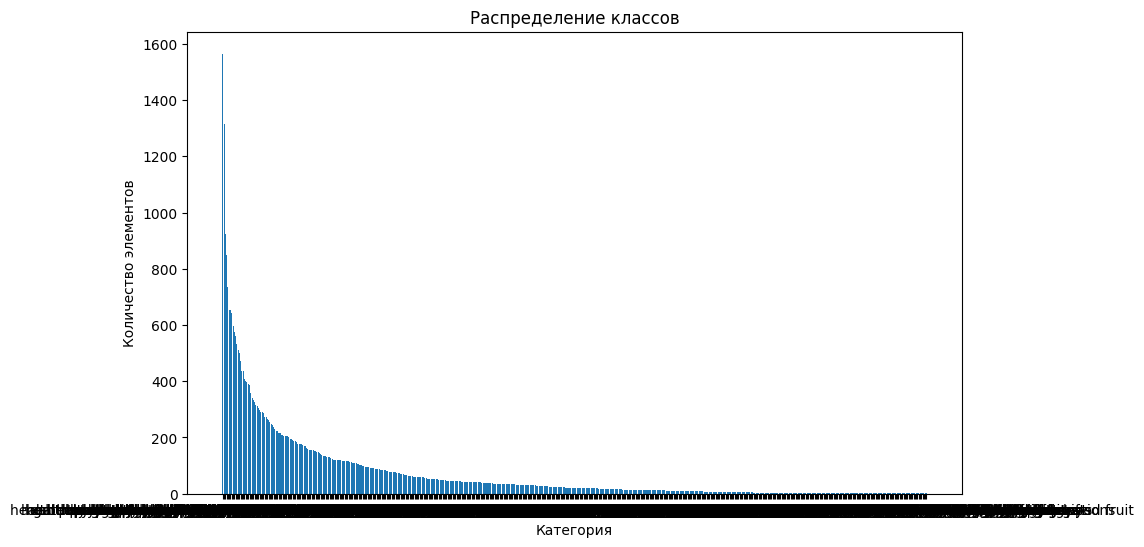

In [ ]:
import matplotlib.pyplot as plt

# Подсчет количества элементов в каждой категории
class_counts = df['category'].value_counts()

# Построение графика
plt.figure(figsize=(10, 6))  # Установка размера графика
plt.bar(class_counts.index, class_counts.values)  # Построение столбчатой диаграммы
plt.xlabel('Категория')
plt.ylabel('Количество элементов')
plt.title('Распределение классов')
plt.show()

In [ ]:
df['category'].value_counts()

category
health personal care/personal care/shaving hair removal         1565
health personal care/nutrition wellness/vitamins supplements    1315
toys games/games/board games                                     924
beauty/hair care/styling tools                                   850
beauty/fragrance/women s                                         737
                                                                ... 
toys games/novelty gag toys/slime putty toys                       1
toys games/games/handheld games                                    1
toys games/puzzles/puzzle play mats                                1
toys games/dolls accessories/unknown                               1
grocery gourmet food/gourmet gifts/spices gifts                    1
Name: count, Length: 555, dtype: int64